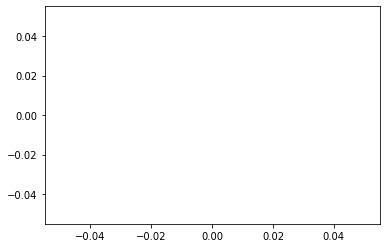

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import LeisureExpNeg, get_random_prob

In [2]:
prob = LeisureExpNeg()

In [3]:
display(Latex(prob.general_setup()))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

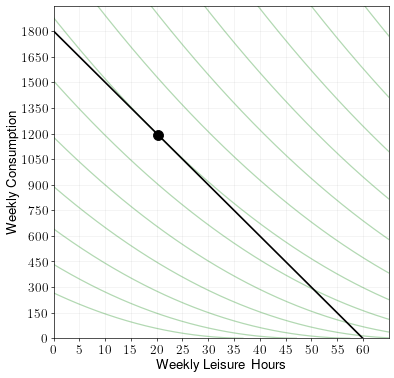

{'c': 1190.25, 'l': 20.325000000000003, 'h': 39.675, 'U': 99.675}

In [4]:
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, with_solution=True)
prob.sol

In [5]:
examples = []
n_found = 0
for w in np.arange(15,80,5):
    for cmax in np.array([60,90,120,150,180,210,240])*w:
        for kd in np.arange(2,5):
            for kn in np.arange(1,kd):
                for c in np.arange(2*cmax/12,11*cmax/12,cmax/12):
                    k = kn/kd
                    a = c**(1-k)/(k*w)
                    params = {'a':a,'kn':kn,'kd':kd,'w':w,'cmax':cmax}
                    prob = LeisureExpNeg(params)
                    if prob.check_solution():
                        n_found+=1
                        examples.append( prob.params | prob.sol )
                        if (n_found%1000==0):
                            print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("LeisureExpNeg_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

1000 examples found...
1356 examples found.


<IPython.core.display.Latex object>

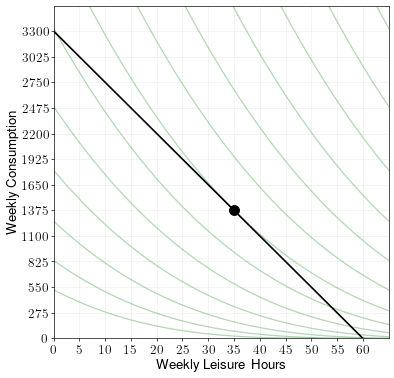

True

In [29]:
prob = get_random_prob(LeisureExpNeg, "LeisureExpNeg_examples.csv")
display(Latex(prob.setup()))
prob.graph_with_IC(show=True, with_solution=True)

In [7]:
1200**0.5 / (0.5*30)

2.3094010767585034